# High Strength of Selection

Variables Tracked in Graphs:

Cooperation Frequency: number of cooperators / total population
PN: Probability to inherit a connection with neighbor (individual connected to parent)
PNC: Probability to inherit a connection with neighbor that is a cooperator, if evolving separately
PND: Probability to inherit a connection with neighbor that is a defector, if evolving separately
PR: Probability to inherit a connection with random individual (not connected to parent)
PRC: Probability to inherit a connection with random individual that is a cooperator, if evolving separately
PRD: Probability to inherit a connection with random individual that is a defector, if evolving separately

Mean shortest Path: Average shortest number of connections in between two individuals, excluding any two individuals with no path of connections in between them.
Connected Components
Mean connected component size
Largest connected component size

**Older Heatmap Function Below**

In [2]:
using JLD2
using StatsBase
using Plots
#backend(:plotly)
using DataFrames
using CSV

function dataRead(data, range, index::Int)
    df = CSV.read(data, DataFrame, delim=",")
    df = df[!, [2, 3, 5, 6, 8, 12, 13, 14, 15, 16, 4, 11, 10, 7, 9, 1]] #used for soring by ben/cl, including graphCalcs
    #df = df[!, [6, 9, 2, 3, 7, 8, 10, 4, 5, 1]] #used for when sorting by pn/r
    #sort!(df, [:pn, :pr]) #used for when sorting by pn/r
    sort!(df, [:ben, :cl])
    dfData = Matrix{Float64}(df)
    dataArr = zeros(range, range, 1) #transforms [range^2 * 10] arr to [range, range, 1] arr
    for(i) in 1:range
        for(j) in 1:range
            dataArr[i, j, 1] = dfData[range*(i-1)+j, index]
        end
    end
    #print(dataArr)
    dataArr
end

function hmap(data::String, range::Int, index::Int, titles::String, cLow::Float64, chI::Float64) 
    #indexes : 1 yidx   2 xidx   3 coopFreq   4 degree   5 fitness  6 pnc_end   7 pnd_end   8 prc_end  9 prd_end  10 shortestPath 11 connComponents 12 meanCCSize 13 largestCC 14 distance  15 inclusion  16 assortment 
    dataArr = dataRead(data, range, index)
    x_axis = String[]
    y_axis = String[]
    for(i) in 1:range #PNC/PND times 10
        push!(x_axis, (string(round((0.4*i/range); digits = 4))))
        push!(y_axis, (string(round((10*i/range); digits = 3))))
    end
    p = heatmap(x_axis, y_axis,  dataArr[:, :, 1]; title = titles, xlabel="CL",ylabel="BEN", clim=(cLow,chI))
end



hmap (generic function with 1 method)

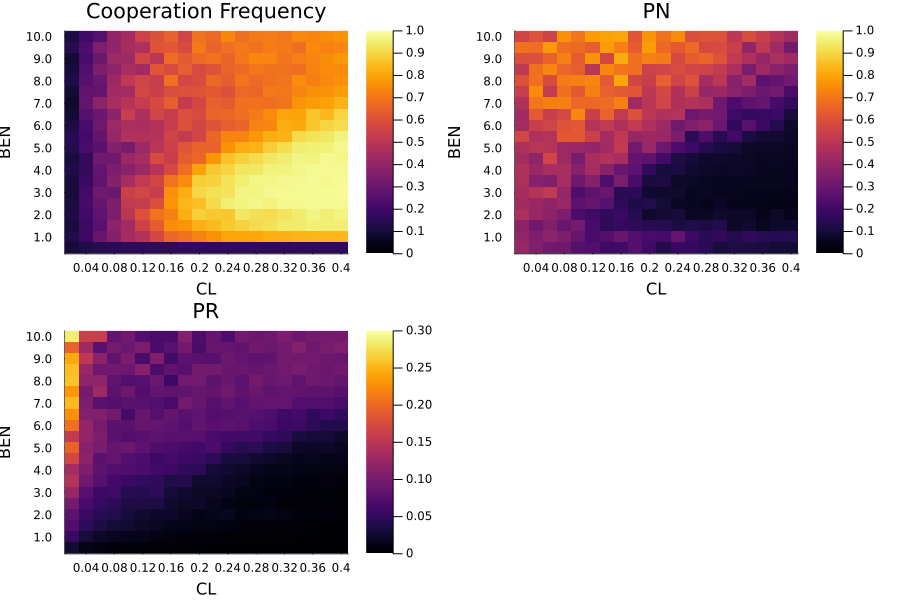

In [3]:
file = "sup_6_no_pnd_new_graphs.csv"
fig1hmaps = [hmap(file, 20, 3, "Cooperation Frequency", 0.0, 1.0), 
hmap(file, 20, 6, "PN", 0.0, 1.0), 
hmap(file, 20, 8, "PR", 0.0, 0.3)] 

plot(fig1hmaps..., colorbar = true, grid=false, size = (900, 600)) 

**Figure 1** Cooperation frequency, PN, and PR for high strength of selection without PND or PRD evolving separetely. The results above were created with: C=0.5, D=0.0, gen=100000, pn=0.5, distInherit=false, pnd=false, pr=0.0001, prd=false, muP=0.01, delta=0.5, sigmapn=0.01, sigmapr=0.01, reps=10.

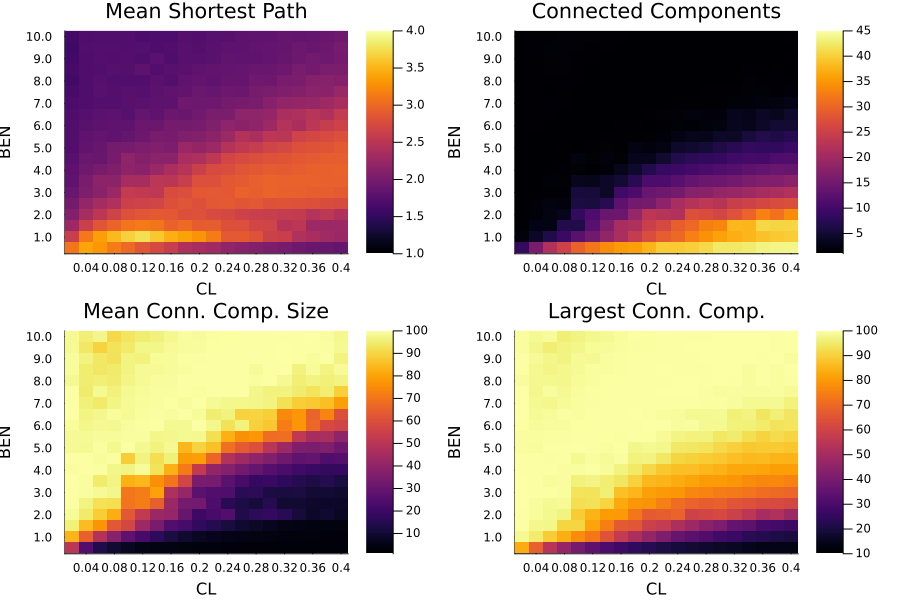

In [4]:
file = "sup_6_no_pnd_new_graphs.csv"
fig1hmaps = [hmap(file, 20, 10, "Mean Shortest Path", 1.0, 4.0), 
hmap(file, 20, 11, "Connected Components", 1.0, 45.0), 
hmap(file, 20, 12, "Mean Conn. Comp. Size", 1.0, 100.0), 
hmap(file, 20, 13, "Largest Conn. Comp.", 10.0, 100.0)]

plot(fig1hmaps..., colorbar = true, grid=false, size = (900, 600)) 

**Figure 2** Mean shortest path, number of connected components, mean size of connected components, and largest connected component's size for high strength of selection without PND or PRD evolving separetely. The results above were created with: C=0.5, D=0.0, gen=100000, pn=0.5, distInherit=false, pnd=false, pr=0.0001, prd=false, muP=0.01, delta=0.5, sigmapn=0.01, sigmapr=0.01, reps=10.

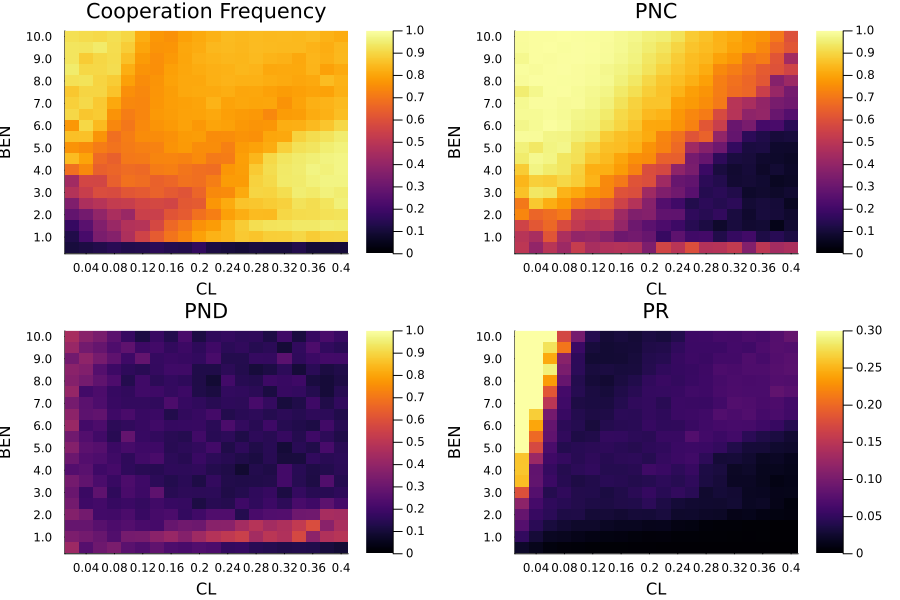

In [5]:
file = "sup_6_pnd_new_graphs.csv"
fig1hmaps = [hmap(file, 20, 3, "Cooperation Frequency", 0.0, 1.0), 
hmap(file, 20, 6, "PNC", 0.0, 1.0), 
hmap(file, 20, 7, "PND", 0.0, 1.0),
hmap(file, 20, 8, "PR", 0.0, 0.3)] 

plot(fig1hmaps..., colorbar = true, grid=false, size = (900, 600)) 

**Figure 3** Cooperation frequency, PNC, PND, and PR for high strength of selection with PND but not PRD evolving separetely. The results above were created with: C=0.5, D=0.0, gen=100000, pn=0.5, distInherit=false, pnd=true, pr=0.0001, prd=false, muP=0.01, delta=0.5, sigmapn=0.01, sigmapr=0.01, reps=10.

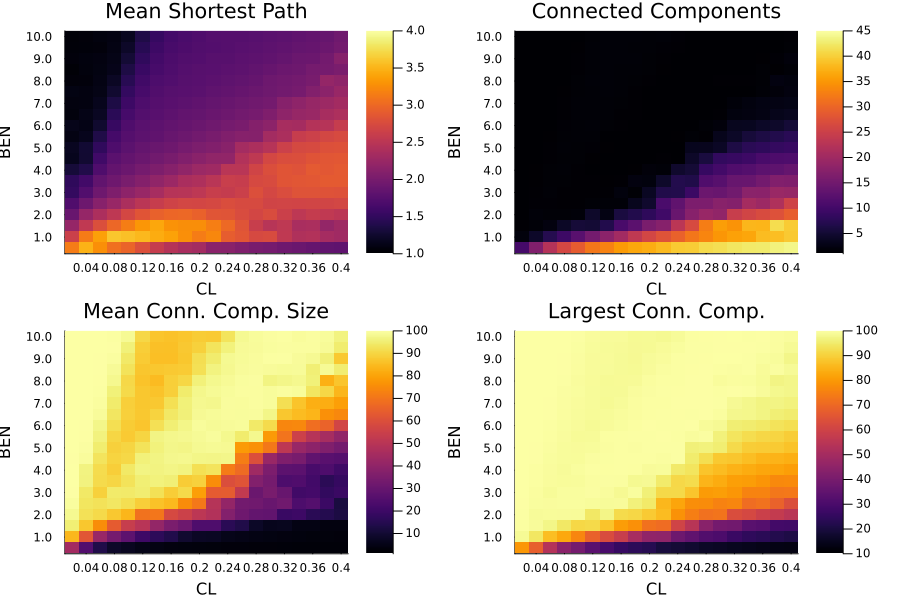

In [6]:
file = "sup_6_pnd_new_graphs.csv"
fig1hmaps = [hmap(file, 20, 10, "Mean Shortest Path", 1.0, 4.0), 
hmap(file, 20, 11, "Connected Components", 1.0, 45.0), 
hmap(file, 20, 12, "Mean Conn. Comp. Size", 1.0, 100.0), 
hmap(file, 20, 13, "Largest Conn. Comp.", 10.0, 100.0)]

plot(fig1hmaps..., colorbar = true, grid=false, size = (900, 600)) 

**Figure 4** Mean shortest path, number of connected components, mean size of connected components, and largest connected component's size for high strength of selection with PND but not PRD evolving separetely. The results above were created with: C=0.5, D=0.0, gen=100000, pn=0.5, distInherit=false, pnd=true, pr=0.0001, prd=false, muP=0.01, delta=0.5, sigmapn=0.01, sigmapr=0.01, reps=10.

**Newer Heatmap Function Below**

In [7]:
function dataRead(data, range, index::Int)
    df = CSV.read(data, DataFrame, delim=",")
    df = df[!, [2, 3, 5, 6, 8, 13, 14, 15, 16, 17, 4, 11, 10, 12, 7, 9, 1]] #used for soring by ben/cl, including graphCalcs
    #df = df[!, [6, 9, 2, 3, 7, 8, 10, 4, 5, 1]] #used for when sorting by pn/r
    #sort!(df, [:pn, :pr]) #used for when sorting by pn/r
    sort!(df, [:ben, :cl])
    dfData = Matrix{Float64}(df)
    dataArr = zeros(range, range, 1) #transforms [range^2 * 10] arr to [range, range, 1] arr
    for(i) in 1:range
        for(j) in 1:range
            dataArr[i, j, 1] = dfData[range*(i-1)+j, index]
        end
    end
    #print(dataArr)
    dataArr
end

function hmap(data::String, range::Int, index::Int, titles::String, cLow::Float64, chI::Float64) 
    #indexes : 1 yidx   2 xidx   3 coopFreq   4 degree   5 fitness  6 pnc_end   7 pnd_end   8 prc_end  9 prd_end  10 shortestPath 11 connComponents 12 meanCCSize 13 largestCC 14 mean connection distance 15 distance  16 inclusion  17 assortment 
    dataArr = dataRead(data, range, index)
    x_axis = String[]
    y_axis = String[]
    for(i) in 1:range #PNC/PND times 10
        push!(x_axis, (string(round((0.4*i/range); digits = 4))))
        push!(y_axis, (string(round((10*i/range); digits = 3))))
    end
    p = heatmap(x_axis, y_axis,  dataArr[:, :, 1]; title = titles, xlabel="CL",ylabel="BEN", clim=(cLow,chI))
    p
end

#redefined hmap() in between runs


hmap (generic function with 1 method)

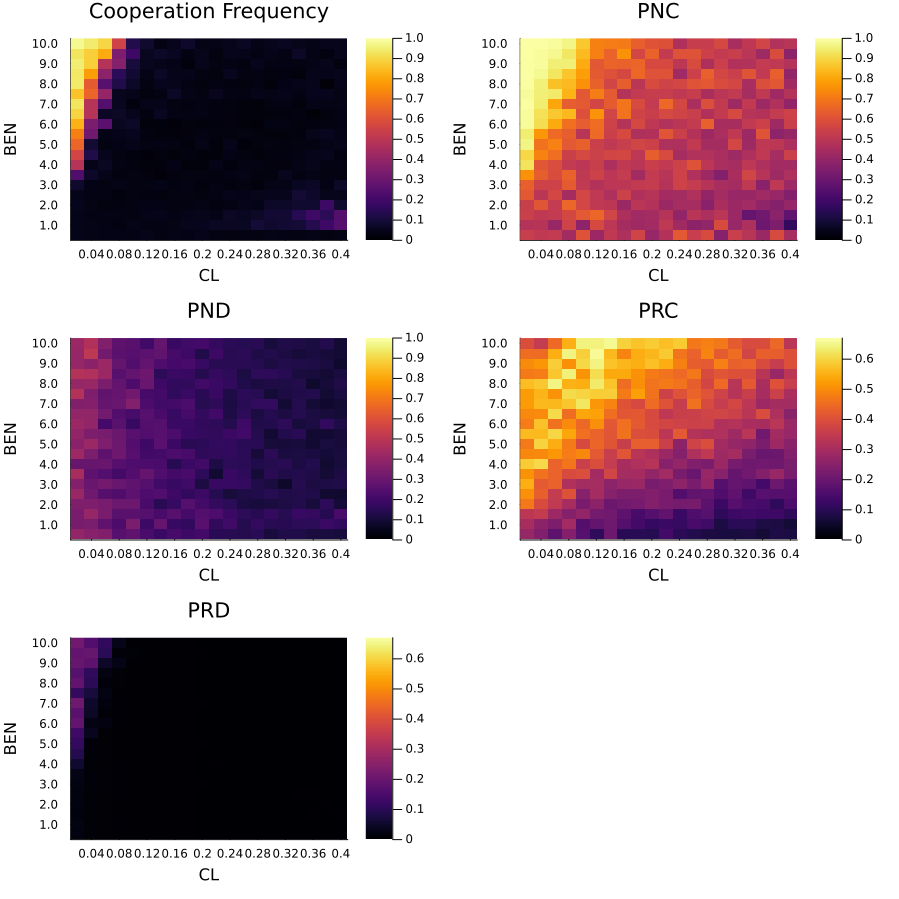

In [8]:
file = "sup_6_prd_new_graphs.csv"
fig1hmaps = [hmap(file, 20, 3, "Cooperation Frequency", 0.0, 1.0), 
hmap(file, 20, 6, "PNC", 0.0, 1.0), 
hmap(file, 20, 7, "PND", 0.0, 1.0),
hmap(file, 20, 8, "PRC", 0.0, 0.67), 
hmap(file, 20, 9, "PRD", 0.0, 0.67)] 

plot(fig1hmaps..., colorbar = true, grid=false, layout = (3,2), size = (900, 900)) 

**Figure 5** Cooperation frequency, PNC, PND, PRC, and PRD for high strength of selection with PND and PRD evolving separetely. The results above were created with: C=0.5, D=0.0, gen=100000, pn=0.5, distInherit=false, pnd=true, pr=0.0001, prd=true, muP=0.01, delta=0.5, sigmapn=0.01, sigmapr=0.01, reps=10.

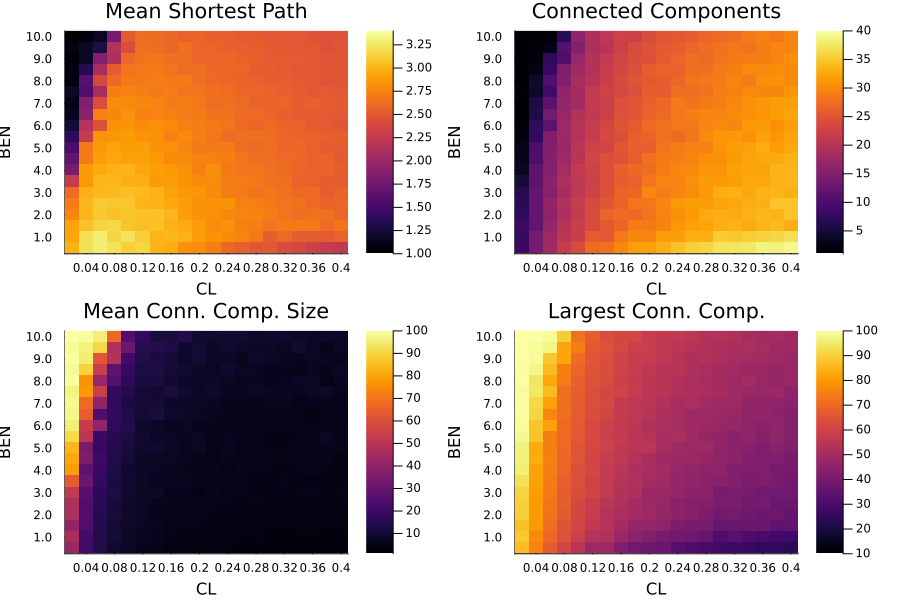

In [9]:
file = "sup_6_prd_new_graphs.csv"
fig1hmaps = [hmap(file, 20, 10, "Mean Shortest Path", 1.0, 3.4), 
hmap(file, 20, 11, "Connected Components", 1.0, 40.0), 
hmap(file, 20, 12, "Mean Conn. Comp. Size", 1.0, 100.0), 
hmap(file, 20, 13, "Largest Conn. Comp.", 10.0, 100.0)]

plot(fig1hmaps..., colorbar = true, grid=false, size = (900, 600)) 

**Figure 6** Mean shortest path, number of connected components, mean size of connected components, and largest connected component's size for high strength of selection with PND and PRD evolving separetely. The results above were created with: C=0.5, D=0.0, gen=100000, pn=0.5, distInherit=false, pnd=true, pr=0.0001, prd=true, muP=0.01, delta=0.5, sigmapn=0.01, sigmapr=0.01, reps=10.

**Trends**

**PND evolving separately from PNC** significantly increased cooperation frequency. PNC evolved to be nearly one in high ben/low cl regions.
PND evolving separately creates a new area of high cooperation in high ben/low cl regions, rather than solely high cl/low ben. 
Mean shortest path, mean connected components, and the largest connected component's size is similar between PND evolving separately and without PND evolving separately.
Mean connected component size is similar with PND evolving separately, but there is a region of slightly lower connectedness near the high ben/low cl area.

**PRD and PND evolving separately from PRC and PNC** caused a collapse in cooperation frequency, except for very high ben/low cl areas. 
PNC tended to be lower than with only pnd evolving separately.
PND is similarly selected against
PRC evolves to very high levels, especially in the high ben/low cl region
PRD evolves to near zero most of the graph, except in high ben/low cl region.
Mean shortest path tended to be significantly higher than without PRD evolving separately, indicating a less connected graph.
Connected components tends to be much higher than without PRD evolving separately, and cl has a stronger effect than ben.
Mean connected component size and largest connected component size collapsed except in the high ben/low cl region.


# Low Strength of Selection

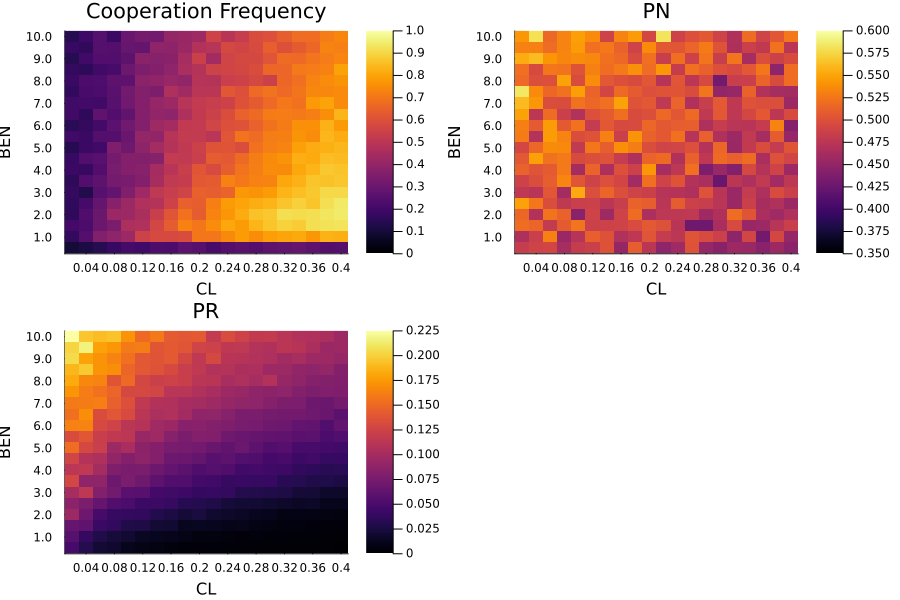

In [10]:
file = "fig_4_no_pnd_new_graphs.csv"
fig1hmaps = [hmap(file, 20, 3, "Cooperation Frequency", 0.0, 1.0), 
hmap(file, 20, 6, "PN", 0.35, 0.6), 
hmap(file, 20, 8, "PR", 0.0, 0.225)] 

plot(fig1hmaps..., colorbar = true, grid=false, layout = (2,2), size = (900, 600)) 

**Figure 7** Cooperation frequency, PN, and PR for low strength of selection without PND or PRD evolving separetely. The results above were created with: C=0.5, D=0.0, gen=100000, distInherit=false, distFactor=1.0, pn=0.5, pnd=false, pr=0.0001, prd=false, muP=0.001, delta=0.1, sigmapn=0.01, sigmapr=0.01, reps=10.

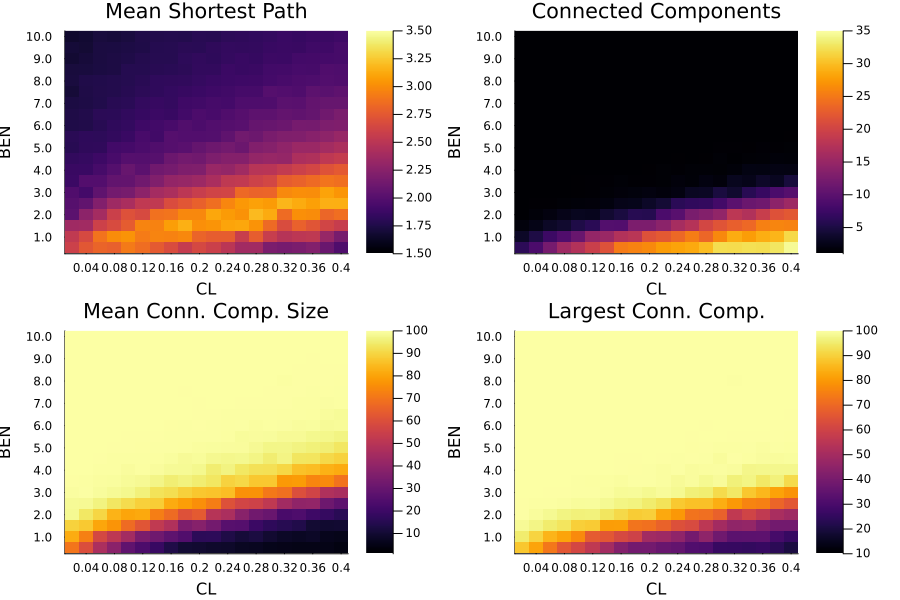

In [11]:
file = "fig_4_no_pnd_new_graphs.csv"
fig1hmaps = [hmap(file, 20, 10, "Mean Shortest Path", 1.5, 3.5), 
hmap(file, 20, 11, "Connected Components", 1.0, 35.0), 
hmap(file, 20, 12, "Mean Conn. Comp. Size", 1.0, 100.0), 
hmap(file, 20, 13, "Largest Conn. Comp.", 10.0, 100.0)]

plot(fig1hmaps..., colorbar = true, grid=false, size = (900, 600)) 

**Figure 8** Mean shortest path, number of connected components, mean size of connected components, and largest connected component's size for low strength of selection without PND or PRD evolving separetely. The results above were created with: C=0.5, D=0.0, gen=100000, distInherit=false, distFactor=1.0, pn=0.5, pnd=false, pr=0.0001, prd=false, muP=0.001, delta=0.1, sigmapn=0.01, sigmapr=0.01, reps=10.

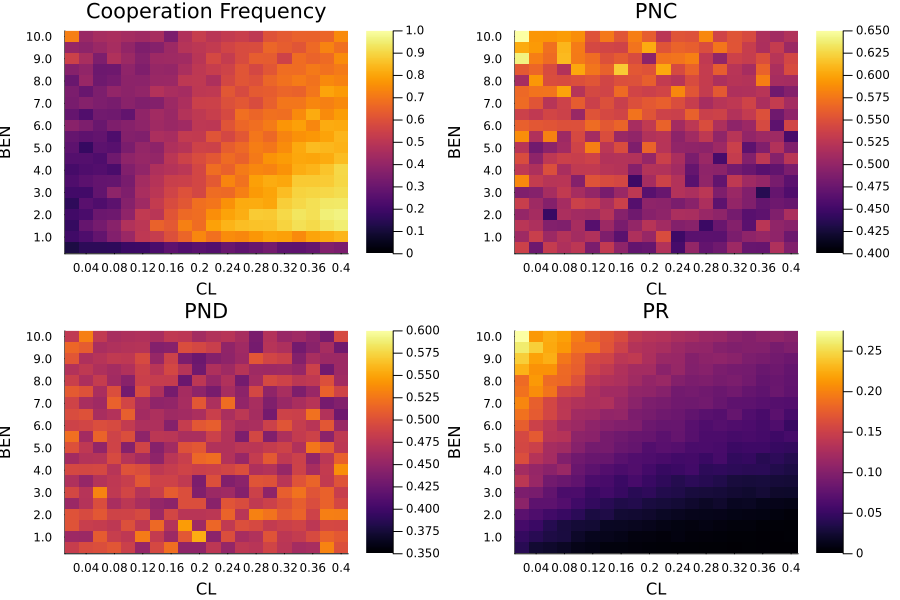

In [12]:
file = "fig_4_pnd_new_graphs.csv"
fig1hmaps = [hmap(file, 20, 3, "Cooperation Frequency", 0.0, 1.0), 
hmap(file, 20, 6, "PNC", 0.4, 0.65), 
hmap(file, 20, 7, "PND", 0.35, 0.6), 
hmap(file, 20, 8, "PR", 0.0, 0.275)] 

plot(fig1hmaps..., colorbar = true, grid=false, layout = (2,2), size = (900, 600)) 

**Figure 9** Cooperation frequency, PN, and PR for low strength of selection with PND but not PRD evolving separetely. The results above were created with: C=0.5, D=0.0, gen=100000, distInherit=false, distFactor=1.0, pn=0.5, pnd=true, pr=0.0001, prd=false, muP=0.001, delta=0.1, sigmapn=0.01, sigmapr=0.01, reps=10.

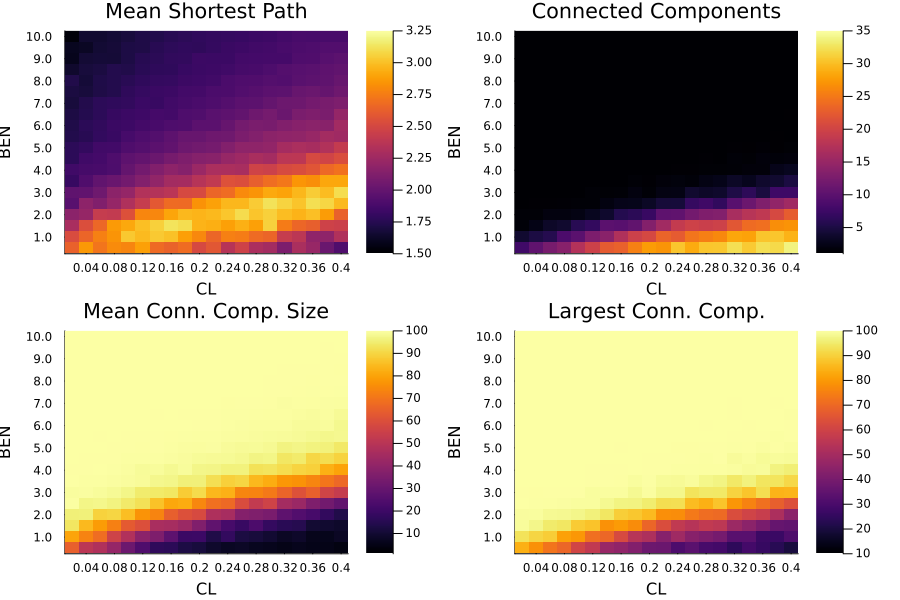

In [13]:
file = "fig_4_pnd_new_graphs.csv"
fig1hmaps = [hmap(file, 20, 10, "Mean Shortest Path", 1.5, 3.25), 
hmap(file, 20, 11, "Connected Components", 1.0, 35.0), 
hmap(file, 20, 12, "Mean Conn. Comp. Size", 1.0, 100.0), 
hmap(file, 20, 13, "Largest Conn. Comp.", 10.0, 100.0)]

plot(fig1hmaps..., colorbar = true, grid=false, size = (900, 600)) 

**Figure 10** Mean shortest path, number of connected components, mean size of connected components, and largest connected component's size for low strength of selection with PND but not PRD evolving separetely. The results above were created with: C=0.5, D=0.0, gen=100000, distInherit=false, distFactor=1.0, pn=0.5, pnd=true, pr=0.0001, prd=false, muP=0.001, delta=0.1, sigmapn=0.01, sigmapr=0.01, reps=10.

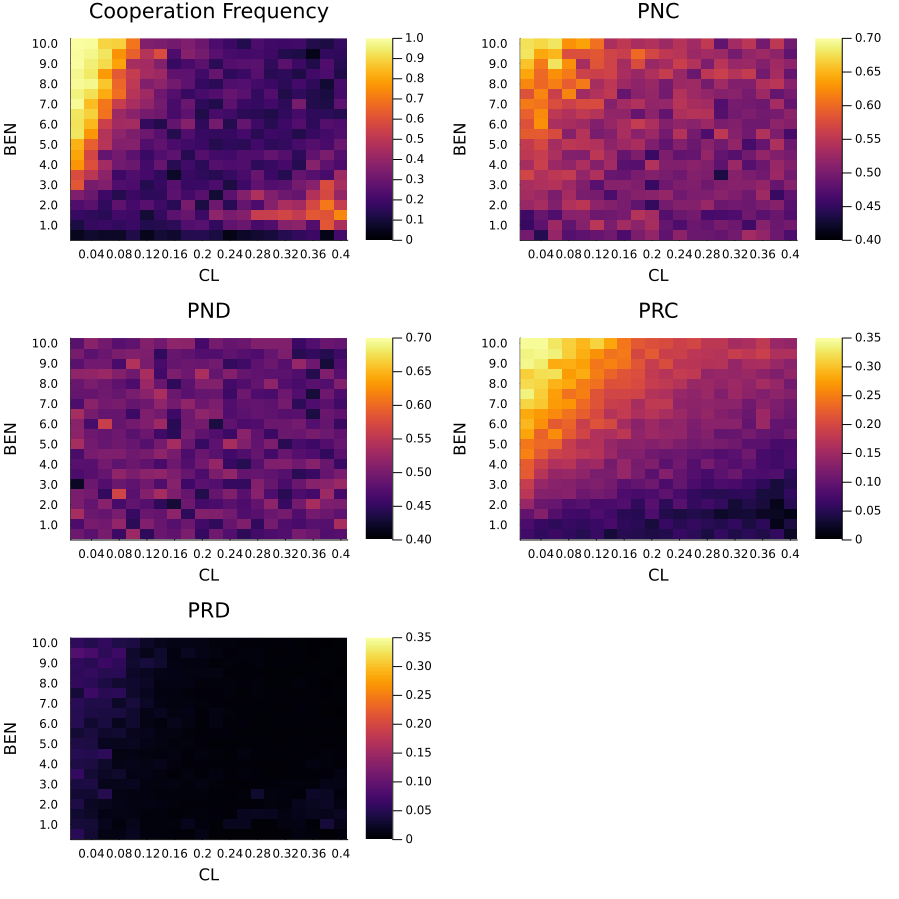

In [14]:
file = "fig_4_prd_new_graphs.csv"
fig1hmaps = [hmap(file, 20, 3, "Cooperation Frequency", 0.0, 1.0), 
hmap(file, 20, 6, "PNC", 0.4, 0.7), 
hmap(file, 20, 7, "PND", 0.4, 0.7),
hmap(file, 20, 8, "PRC", 0.0, 0.35), 
hmap(file, 20, 9, "PRD", 0.0, 0.35)] 

plot(fig1hmaps..., colorbar = true, grid=false, layout = (3,2), size = (900, 900)) 

**Figure 11** Cooperation frequency, PN, and PR for low strength of selection with PND and PRD evolving separetely. The results above were created with: C=0.5, D=0.0, gen=100000, distInherit=false, distFactor=1.0, pn=0.5, pnd=true, pr=0.0001, prd=true, muP=0.001, delta=0.1, sigmapn=0.01, sigmapr=0.01, reps=10.

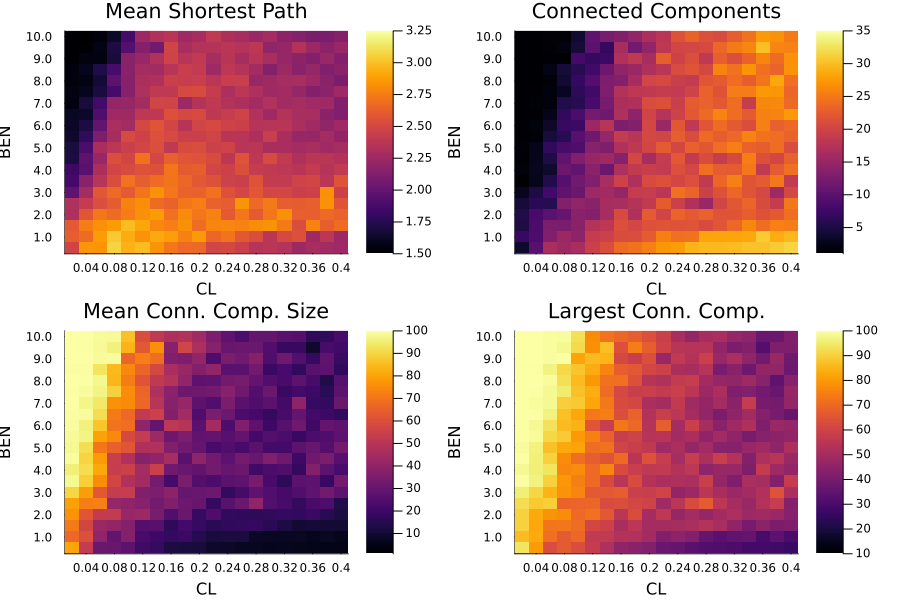

In [15]:
file = "fig_4_prd_new_graphs.csv"
fig1hmaps = [hmap(file, 20, 10, "Mean Shortest Path", 1.5, 3.25), 
hmap(file, 20, 11, "Connected Components", 1.0, 35.0), 
hmap(file, 20, 12, "Mean Conn. Comp. Size", 1.0, 100.0), 
hmap(file, 20, 13, "Largest Conn. Comp.", 10.0, 100.0)]

plot(fig1hmaps..., colorbar = true, grid=false, size = (900, 600)) 

**Figure 12** Mean shortest path, number of connected components, mean size of connected components, and largest connected component's size for low strength of selection with PND and PRD evolving separetely. The results above were created with: C=0.5, D=0.0, gen=100000, distInherit=false, distFactor=1.0, pn=0.5, pnd=true, pr=0.0001, prd=false, muP=0.001, delta=0.1, sigmapn=0.01, sigmapr=0.01, reps=10.

**Trends**

**PND evolving separately from PNC** slighlty increased cooperation frequency. 
Unlike with higher selection pressure, PND evolving separately does not create a new area of high cooperation in high ben/low cl regions, with solely high cl/low ben having near-1.0 cooperation frequency.
PNC and PND do not evolve with strong trends, staying between 0.36-0.6 for all values of ben/cl tested. PNC tends to be higher in the higher ben regions, but not significantly.
Mean shortest path, mean connected components, mean size of connected components. and the largest connected component's size is similar between PND evolving separately and without PND evolving separately.
There is no region of lower mean size of connected components in the higher ben/lower cl region as seen with higher selection pressure.

**PRD and PND evolving separately from PRC and PNC** caused a collapse in cooperation frequency, except for very high ben/low cl areas, which saw higher cooperation frequencies than without PRD evolving separetely. 
PNC tended to show a stronger pattern and range of values than without PRD evolving separately, with higher values in the high ben/low cl region.
PND stabilizes around 0.45-0.55 for all ben/cl tested.
PRC evolves to very high levels, especially in the high ben/low cl region
PRD evolves to near zero for all ben/cl tested.
Mean shortest path tended to be significantly higher in much of the tested range than without PRD evolving separately, indicating a less connected graph.
Connected components tends to be much higher than without PRD evolving separately, and cl has a stronger effect than ben.
Mean connected component size and largest connected component size collapsed except in the low cl region.
